##Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Importing Dataset

In [2]:
df = pd.read_csv("/content/german_credit_data.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [3]:
df.shape[0]

1000

In [4]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [5]:
pd.isna(df).sum()

,0
Unnamed: 0,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0


In [6]:
print(df["Saving accounts"].value_counts())

print(df["Checking account"].value_counts())

Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64
Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64


##Handle Missing Values

In [7]:
pd.isna(df).sum()

,0
Unnamed: 0,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0


In [8]:
mode_value = df['Saving accounts'].mode()[0]

df['Saving accounts'] = df['Saving accounts'].fillna(mode_value)

In [9]:
mode_value = df['Checking account'].mode()[0]

df['Checking account'] = df['Checking account'].fillna(mode_value)

In [10]:
pd.isna(df).sum()

,0
Unnamed: 0,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,0
Checking account,0
Credit amount,0
Duration,0
Purpose,0


In [11]:
df = df.drop("Unnamed: 0", axis = 1)

In [12]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


##Handle outliers

Outliers in Age:
     Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
163   70    male    3    free          little         moderate           7308   
186   74  female    3    free          little         moderate           5129   
330   75    male    3    free          little           little           6615   
430   74    male    1     own          little           little           3448   
536   75  female    3     own          little           little           1374   
606   74    male    3     own          little           little           4526   
756   74    male    0     own          little             rich           1299   

     Duration   Purpose  
163        10       car  
186         9       car  
330        24       car  
430         5  business  
536         6       car  
606        24  business  
756         6       car  

Outliers in Credit amount:
     Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
18    44  female 

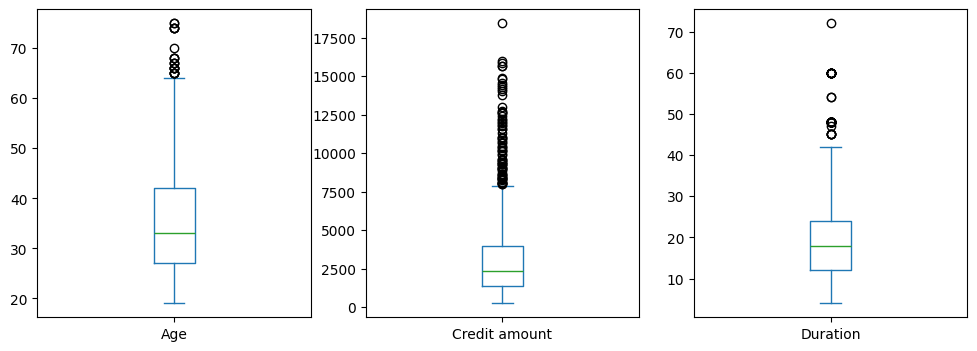

In [13]:
from scipy import stats
import numpy as np

# Calculate Z-scores for each numerical column
z_scores_age = np.abs(stats.zscore(df['Age']))
z_scores_credit = np.abs(stats.zscore(df['Credit amount']))
z_scores_duration = np.abs(stats.zscore(df['Duration']))

# Identify outliers
outliers_age = df[z_scores_age > 3]
outliers_credit = df[z_scores_credit > 3]
outliers_duration = df[z_scores_duration > 3]

print("Outliers in Age:")
print(outliers_age)
print("\nOutliers in Credit amount:")
print(outliers_credit)
print("\nOutliers in Duration:")
print(outliers_duration)

df[['Age', 'Credit amount', 'Duration']].plot(kind='box', subplots=True, layout=(1, 3), figsize=(12, 4))
plt.show()

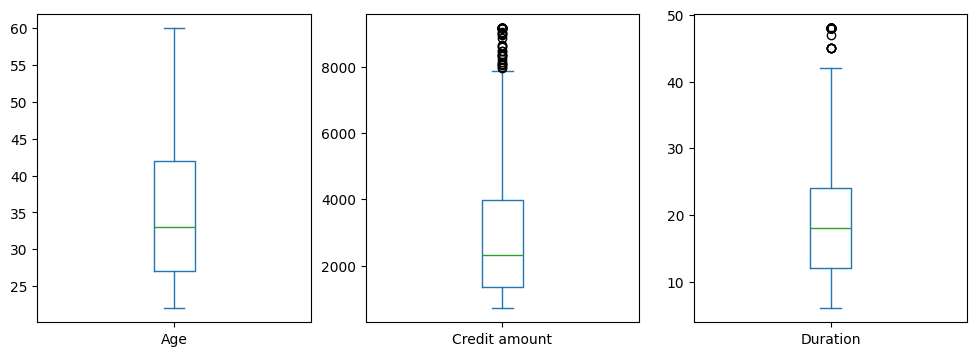

In [14]:
def cap_values(column, lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = column.quantile(lower_percentile)
    upper_bound = column.quantile(upper_percentile)
    return column.clip(lower_bound, upper_bound)

df['Age'] = cap_values(df['Age'])
df['Credit amount'] = cap_values(df['Credit amount'])
df['Duration'] = cap_values(df['Duration'])

df[['Age', 'Credit amount', 'Duration']].plot(kind='box', subplots=True, layout=(1, 3), figsize=(12, 4))
plt.show()

##Data Correlation

###Correlation matrix

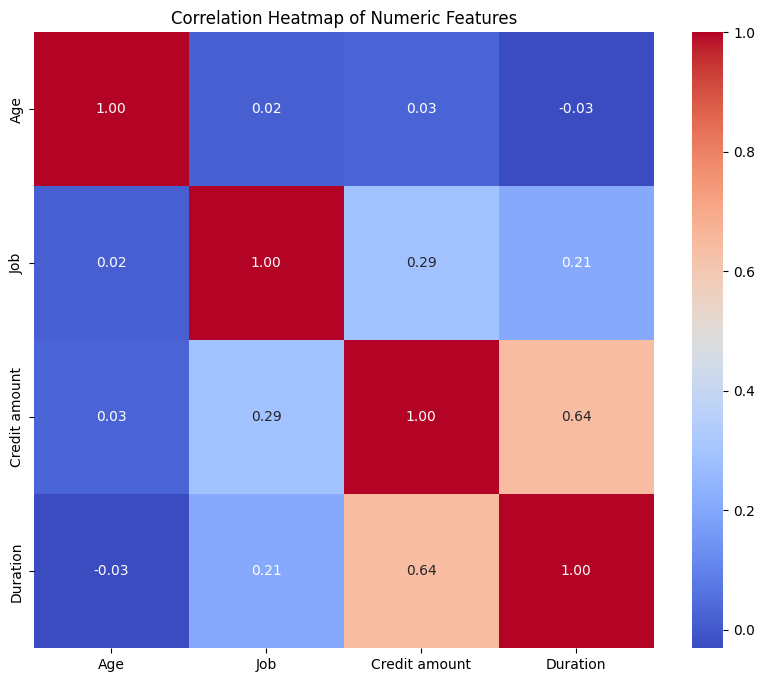

In [15]:
numeric_df = df.select_dtypes(include=[np.number])

if len(numeric_df.columns) >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()

###Pair Plot

<Figure size 1200x1000 with 0 Axes>

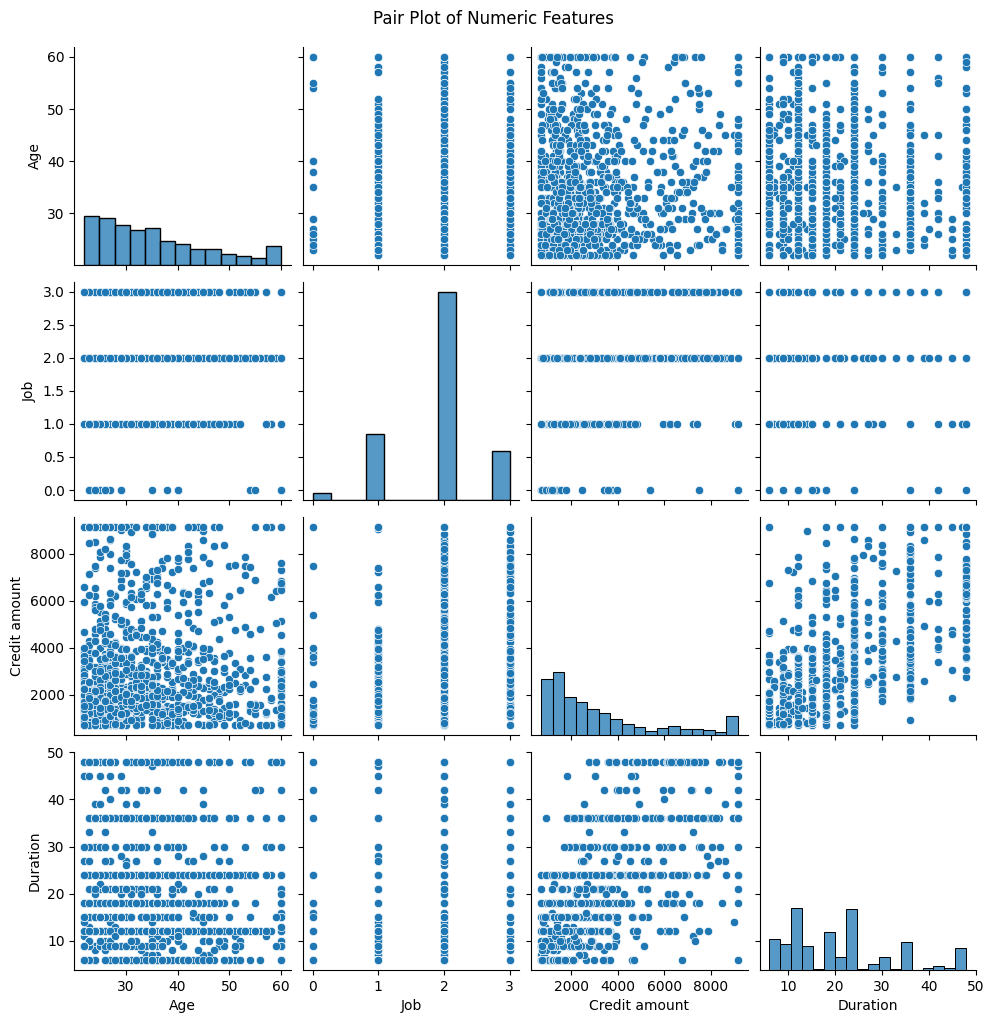

In [16]:
plt.figure(figsize = (12, 10))
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()

###Histograms for numerical columns

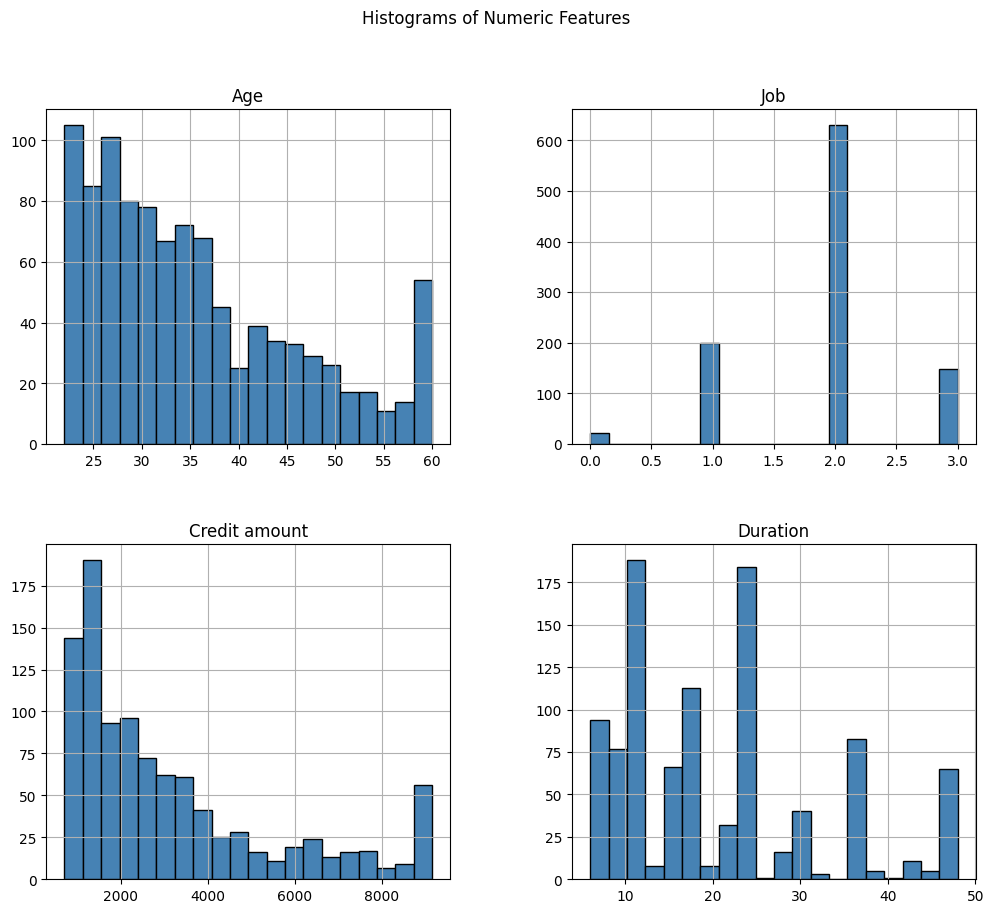

In [17]:
numeric_df.hist(figsize=(12, 10), bins=20, color='steelblue', edgecolor='black')
plt.suptitle('Histograms of Numeric Features')
plt.show()

<ipython-input-18-92f50acdcd5b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='Set2')


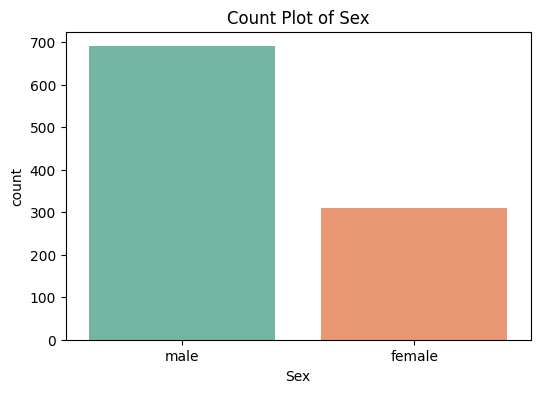

In [18]:
# Count sex values
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=df, palette='Set2')
plt.title('Count Plot of Sex')
plt.show()

### Bar plot of Housing counts grouped by Sex

<ipython-input-19-90f811b84ecd>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Housing', y=np.ones(len(df)), data=df, estimator=lambda x: len(x), ci=None, palette='Set3')
<ipython-input-19-90f811b84ecd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Housing', y=np.ones(len(df)), data=df, estimator=lambda x: len(x), ci=None, palette='Set3')


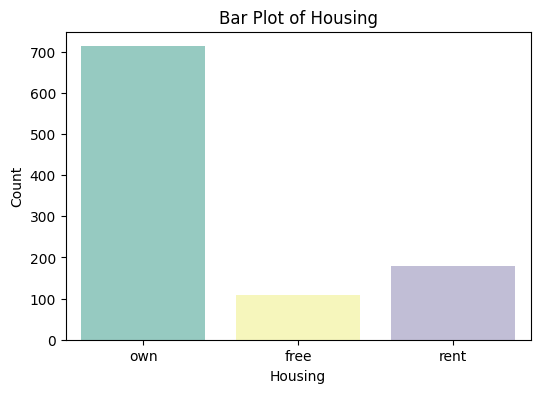

In [19]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Housing', y=np.ones(len(df)), data=df, estimator=lambda x: len(x), ci=None, palette='Set3')
plt.title('Bar Plot of Housing')
plt.ylabel('Count')
plt.show()

### Box Plot for Credit amount across different Saving accounts categories

<ipython-input-20-452556f08959>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Saving accounts', y='Credit amount', data=df, palette='Pastel1')


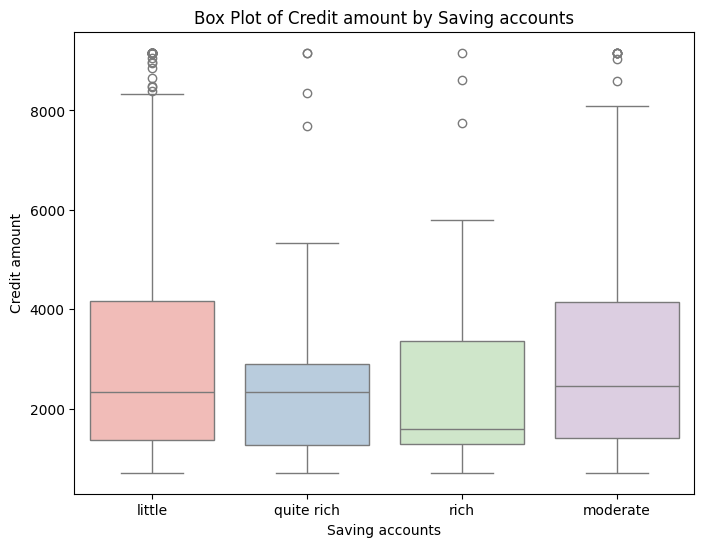

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Saving accounts', y='Credit amount', data=df, palette='Pastel1')
plt.title('Box Plot of Credit amount by Saving accounts')
plt.show()

### Boxen Plot for Credit amount across different Job categories

<ipython-input-21-870011792cad>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Job', y='Credit amount', data=df, palette='Pastel2')


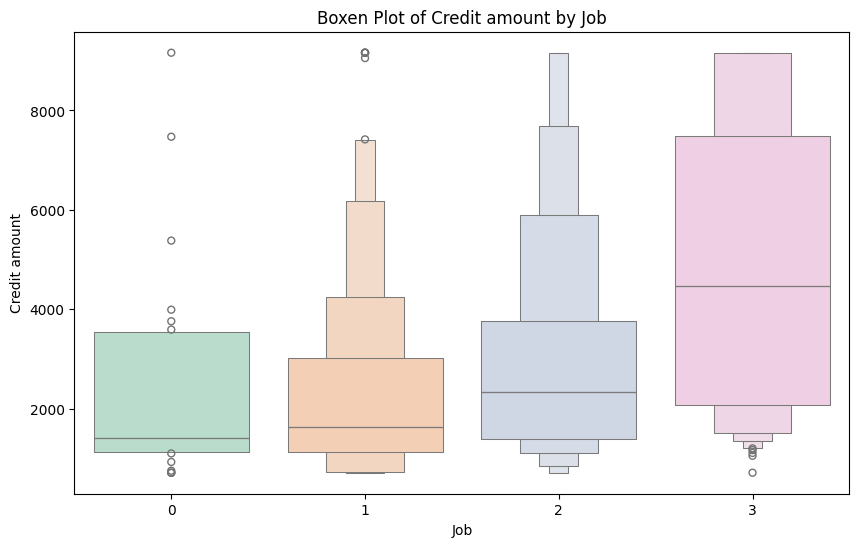

In [21]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Job', y='Credit amount', data=df, palette='Pastel2')
plt.title('Boxen Plot of Credit amount by Job')
plt.show()

### Violin Plot for Duration across different Housing statuses

<ipython-input-22-e287b20b1444>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Housing', y='Duration', data=df, palette='Set2')


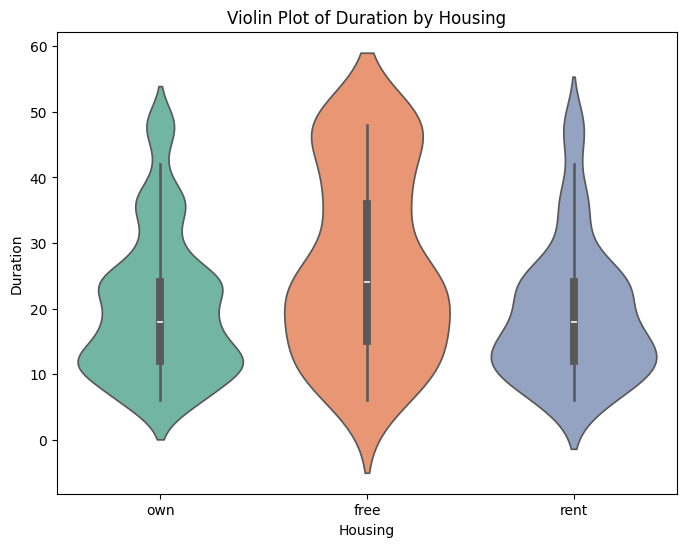

In [22]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Housing', y='Duration', data=df, palette='Set2')
plt.title('Violin Plot of Duration by Housing')
plt.show()

### Strip Plot for Age grouped by Sex

<ipython-input-23-60002e8c7d01>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Sex', y='Age', data=df, jitter=True, palette='Set1')


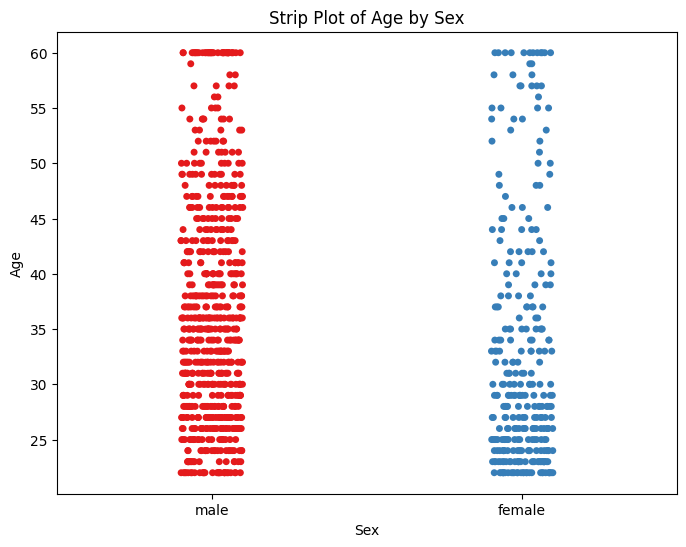

In [23]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='Sex', y='Age', data=df, jitter=True, palette='Set1')
plt.title('Strip Plot of Age by Sex')
plt.show()

##Create a binary target variable 'HighCredit' and train models

In [24]:
# Add risk mappings
savings_risk = {'rich': 0.01, 'quite rich': 0.15, 'moderate': 0.35, 'little': 0.85, 'none': 1.0}
checking_risk = {'rich': 0.01, 'moderate': 0.25, 'little': 0.85, 'none': 1.0}
job_risk = {0: 0.8, 1: 0.5, 2: 0.3, 3: 0.1}
housing_risk = {'own': 0.1, 'free': 0.5, 'rent': 0.9}
purpose_risk = {
    'car': 0.5, 'furniture/equipment': 0.3, 'radio/TV': 0.2, 'domestic appliances': 0.3,
    'repairs': 0.4, 'education': 0.3, 'business': 0.8, 'vacation/others': 0.7
}

df['SavingsRiskFactor'] = df['Saving accounts'].map(savings_risk).fillna(0.5)
df['CheckingRiskFactor'] = df['Checking account'].map(checking_risk).fillna(0.5)
df['JobRiskFactor'] = df['Job'].map(job_risk).fillna(0.5)
df['HousingRiskFactor'] = df['Housing'].map(housing_risk).fillna(0.5)
df['PurposeRiskFactor'] = df['Purpose'].map(purpose_risk).fillna(0.4)

# Calculate risk score with more features
df['RiskScore'] = (
    (df['Credit amount'] / df['Credit amount'].max()) * 0.22 +
    (df['Duration'] / df['Duration'].max()) * 0.22 +
    (1 - (df['Age'] / df['Age'].max())) * 0.12 +
    df['SavingsRiskFactor'] * 0.10 +
    df['CheckingRiskFactor'] * 0.10 +
    df['JobRiskFactor'] * 0.10 +
    df['HousingRiskFactor'] * 0.12 +
    df['PurposeRiskFactor'] * 0.12
)

# Use the 70th percentile as the threshold for high risk
threshold = df['RiskScore'].quantile(0.7)
df['CreditRisk'] = (df['RiskScore'] > threshold).astype(int)
print(df['CreditRisk'].value_counts())

CreditRisk
0    700
1    300
Name: count, dtype: int64


In [25]:
avg_value = df['Credit amount'].mean()
print(avg_value)

3136.2295


###One Hot Encoding

In [26]:
# Include Age, Job, Duration, and convert categorical variables using one-hot encoding
features = ['Age', 'Job', 'Duration', 'Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Credit amount']
X = df[features]
y = df['CreditRisk']  # Now using CreditRisk instead of HighCredit

In [27]:
X = pd.get_dummies(X, drop_first=True)
X = pd.DataFrame(X)

### Split the data into train and test sets

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Prediction Accuracy: 0.97


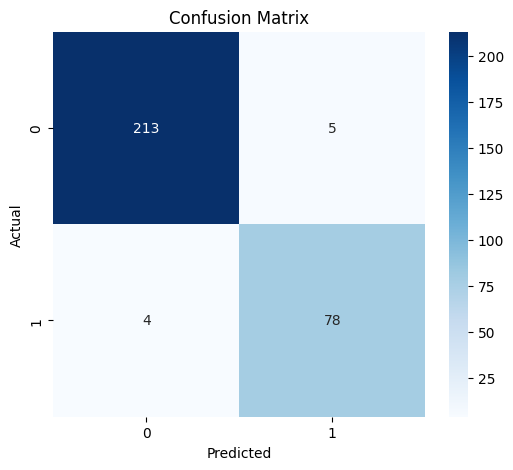

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Calculate and print the prediction accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Prediction Accuracy: {accuracy:.2f}')

# Confusion Matrix and its heatmap display
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

###Decision Tree Classification

In [31]:
from sklearn.tree import DecisionTreeClassifier
decision_model = DecisionTreeClassifier(criterion='entropy', random_state = 0)
decision_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Prediction Accuracy: 0.90


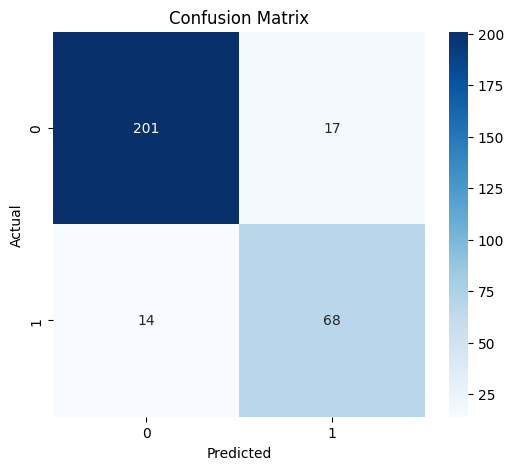

In [32]:
y_pred = decision_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Prediction Accuracy: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

###KNN Classifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

Prediction Accuracy: 0.84


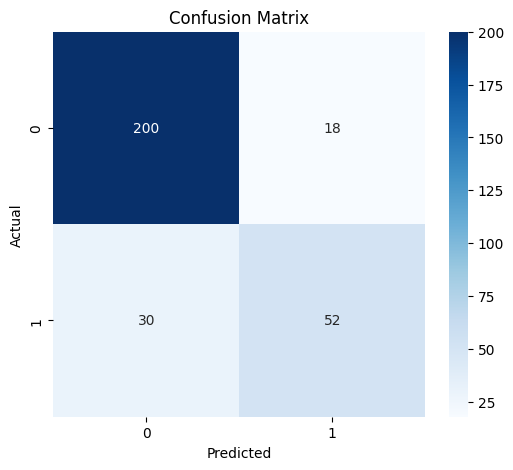

In [34]:
y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Prediction Accuracy: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

###Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
rfc_classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', random_state=0)

Prediction Accuracy: 0.95


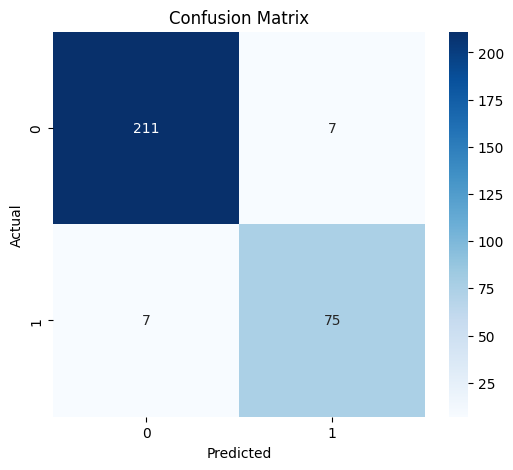

In [36]:
y_pred = rfc_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Prediction Accuracy: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

###Naive Bayes Classifier

In [37]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

Prediction Accuracy: 0.91


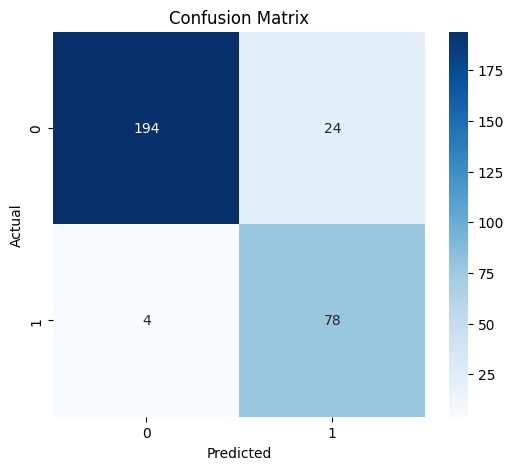

In [38]:
y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Prediction Accuracy: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

###Support Vector Classifier

In [39]:
from sklearn.svm import SVC
sv_classifier = SVC(kernel = 'linear', random_state = 0)
sv_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

Prediction Accuracy: 0.94


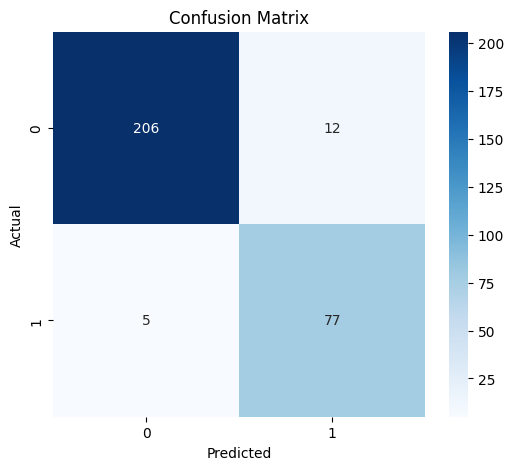

In [40]:
y_pred = sv_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Prediction Accuracy: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

###Kernel SVM

In [41]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'rbf', random_state = 0)
svc_classifier.fit(X_train, y_train)

SVC(random_state=0)

Prediction Accuracy: 0.86


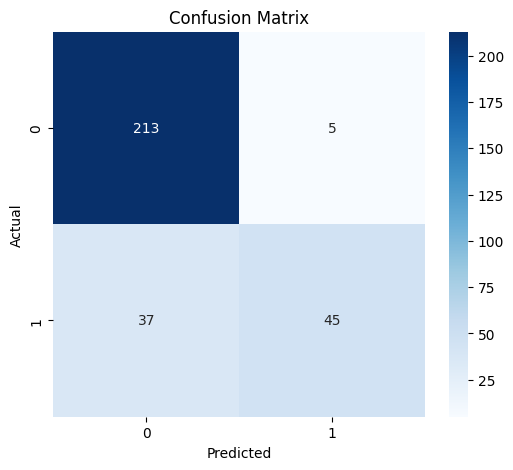

In [42]:
y_pred = svc_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Prediction Accuracy: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

##Model Comparision

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': model,
    'Decision Tree': decision_model,
    'KNN': knn_classifier,
    'Random Forest': rfc_classifier,
    'Naive Bayes': nb_classifier,
    'Linear SVC': sv_classifier,
    'Kernel SVM': svc_classifier
}

# Dictionary to store model performance
model_performance = {}
for name, model in models.items():
    # Get predictions
    y_pred = model.predict(X_test)

    # Get probabilities for ROC curve (if available)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):  # For SVM models without probability
        y_prob = model.decision_function(X_test)
    else:
        y_prob = None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate AUC-ROC if probabilities are available
    if y_prob is not None:
        auc_roc = roc_auc_score(y_test, y_prob)
    else:
        auc_roc = None

    # Store performance
    model_performance[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc_roc': auc_roc
    }

    # Print performance
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} Precision: {precision:.4f}")
    print(f"{name} Recall: {recall:.4f}")
    print(f"{name} F1 Score: {f1:.4f}")
    if auc_roc is not None:
        print(f"{name} AUC-ROC: {auc_roc:.4f}")
    print(f"{name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

Logistic Regression Accuracy: 0.8700
Logistic Regression Precision: 0.8739
Logistic Regression Recall: 0.8700
Logistic Regression F1 Score: 0.8582
Logistic Regression AUC-ROC: 0.8363
Logistic Regression Confusion Matrix:
[[146   3]
 [ 23  28]]


Decision Tree Accuracy: 0.9100
Decision Tree Precision: 0.9130
Decision Tree Recall: 0.9100
Decision Tree F1 Score: 0.9111
Decision Tree AUC-ROC: 0.8945
Decision Tree Confusion Matrix:
[[138  11]
 [  7  44]]


KNN Accuracy: 0.8500
KNN Precision: 0.8446
KNN Recall: 0.8500
KNN F1 Score: 0.8456
KNN AUC-ROC: 0.8610
KNN Confusion Matrix:
[[138  11]
 [ 19  32]]


Random Forest Accuracy: 0.9700
Random Forest Precision: 0.9700
Random Forest Recall: 0.9700
Random Forest F1 Score: 0.9700
Random Forest AUC-ROC: 0.9929
Random Forest Confusion Matrix:
[[146   3]
 [  3  48]]


Naive Bayes Accuracy: 0.8950
Naive Bayes Precision: 0.9175
Naive Bayes Recall: 0.8950
Naive Bayes F1 Score: 0.8993
Naive Bayes AUC-ROC: 0.9518
Naive Bayes Confusion Matrix:
[[130  19]


###Best model

In [57]:
best_model_name = max(model_performance, key=lambda x: model_performance[x]['f1_score'])

# Print the best model and its performance
print(f"Best Model: {best_model_name}")
print("Performance:")
for metric, value in model_performance[best_model_name].items():
    if value is not None:
        print(f"{metric}: {value:.4f}")

Best Model: Random Forest
Performance:
accuracy: 0.9700
precision: 0.9700
recall: 0.9700
f1_score: 0.9700
auc_roc: 0.9929


In [58]:
# Create a DataFrame for easy comparison
import pandas as pd
performance_df = pd.DataFrame(model_performance).T
performance_df = performance_df.sort_values('f1_score', ascending=False)
print("\nModel Performance Comparison:")
print(performance_df)


Model Performance Comparison:
                     accuracy  precision  recall  f1_score   auc_roc
Random Forest           0.970   0.970000   0.970  0.970000  0.992894
Linear SVC              0.950   0.952132   0.950  0.950603  0.994473
Decision Tree           0.910   0.913034   0.910  0.911086  0.894460
Naive Bayes             0.895   0.917462   0.895  0.899324  0.951836
Logistic Regression     0.870   0.873932   0.870  0.858234  0.836294
Kernel SVM              0.870   0.873932   0.870  0.858234  0.836294
KNN                     0.850   0.844608   0.850  0.845578  0.861034


###ROC Curve

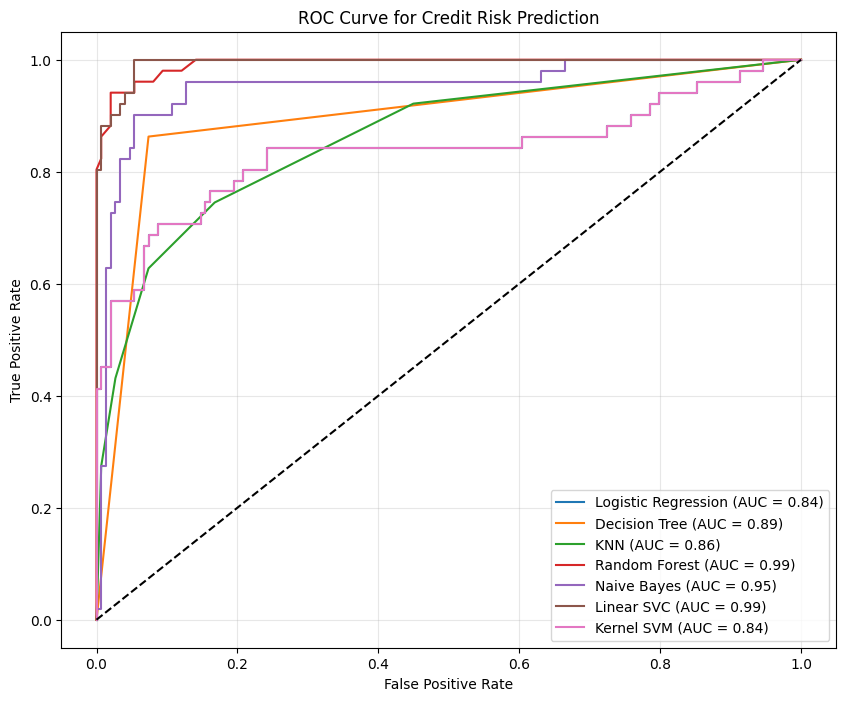

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(10, 8))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')
    elif hasattr(model, "decision_function"):
        y_prob = model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Credit Risk Prediction')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

###Bar Chart for model Performance

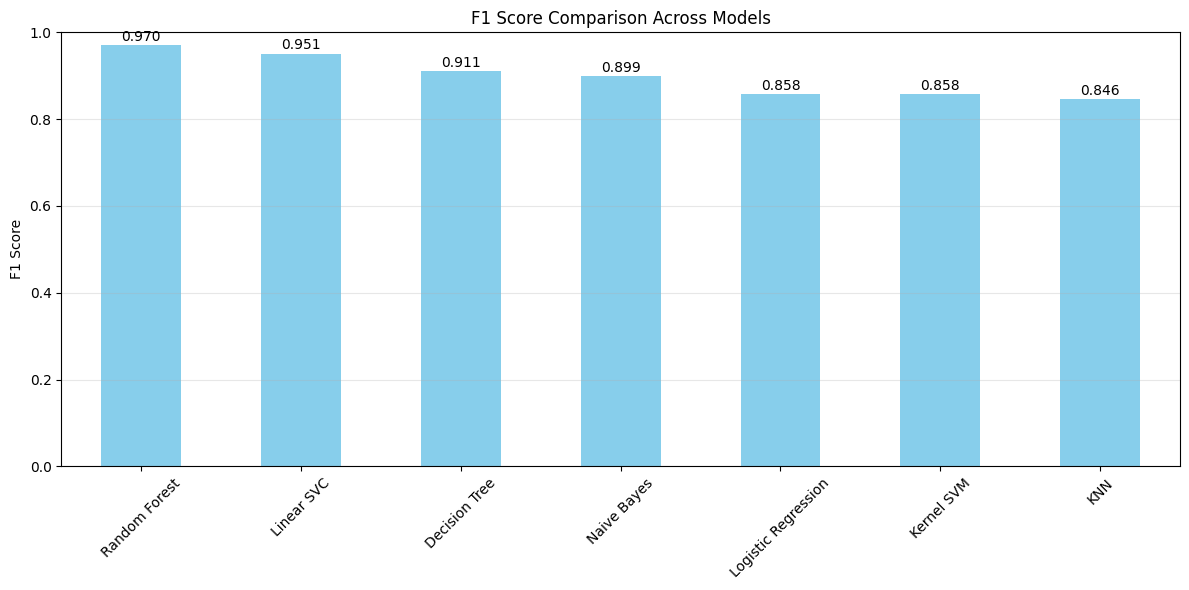

In [60]:
plt.figure(figsize=(12, 6))
performance_df['f1_score'].plot(kind='bar', color='skyblue')
plt.title('F1 Score Comparison Across Models')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(performance_df['f1_score']):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')
plt.tight_layout()
plt.show()

##Feature Importance

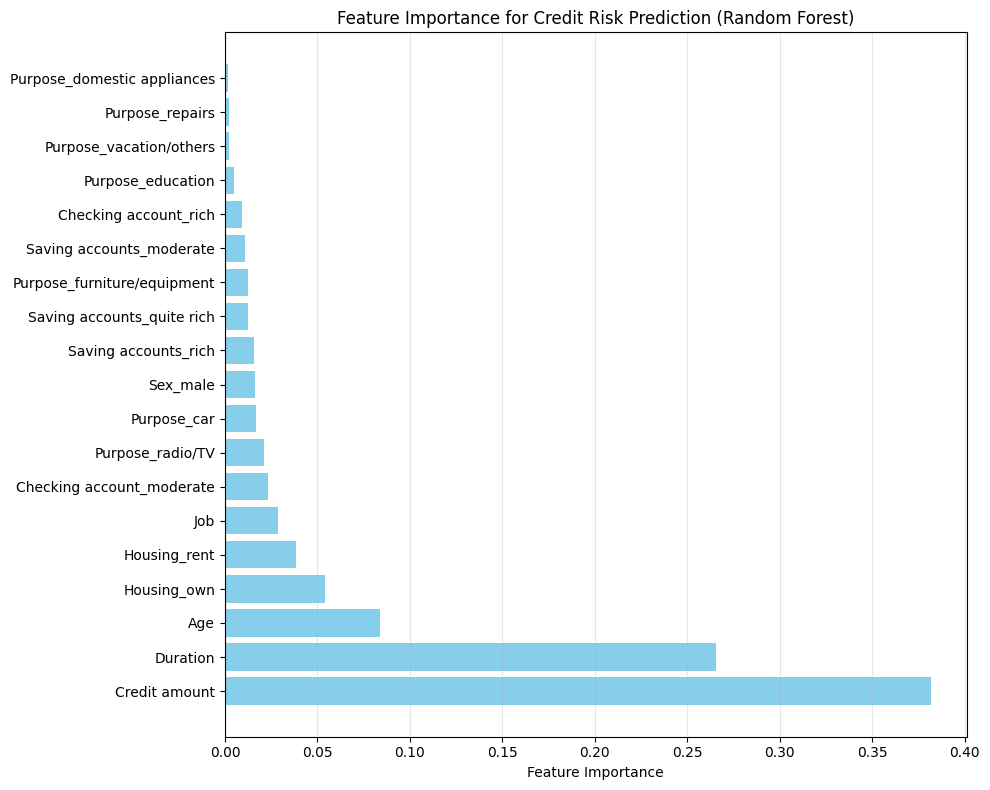

Feature importances for credit risk prediction:
- Credit amount: 0.3819
- Duration: 0.2655
- Age: 0.0838
- Housing_own: 0.0541
- Housing_rent: 0.0384
- Job: 0.0286
- Checking account_moderate: 0.0233
- Purpose_radio/TV: 0.0208
- Purpose_car: 0.0167
- Sex_male: 0.0161
- Saving accounts_rich: 0.0155
- Saving accounts_quite rich: 0.0122
- Purpose_furniture/equipment: 0.0122
- Saving accounts_moderate: 0.0108
- Checking account_rich: 0.0093
- Purpose_education: 0.0047
- Purpose_vacation/others: 0.0023
- Purpose_repairs: 0.0021
- Purpose_domestic appliances: 0.0016


In [61]:
best_model = models[best_model_name]

if hasattr(best_model, 'coef_'):
    # For linear models like Logistic Regression or Linear SVC
    feature_names = X.columns
    coefficients = best_model.coef_[0]

    # Pair feature names with their coefficients
    feature_importance = sorted(zip(feature_names, coefficients), key=lambda x: abs(x[1]), reverse=True)

    # Separate the features and their importance for plotting
    features, importance = zip(*feature_importance)

    # Plot the feature importance
    plt.figure(figsize=(10, 8))
    plt.barh(features, importance, color='skyblue')
    plt.xlabel('Coefficient Value')
    plt.title(f'Feature Importance for Credit Risk Prediction ({best_model_name})')
    plt.axvline(x=0, color='gray', linestyle='--')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Interpret top features
    print("Top factors increasing credit risk (positive coefficients):")
    for feature, coef in feature_importance:
        if coef > 0:
            print(f"- {feature}: {coef:.4f}")

    print("\nTop factors decreasing credit risk (negative coefficients):")
    for feature, coef in feature_importance:
        if coef < 0:
            print(f"- {feature}: {coef:.4f}")

elif hasattr(best_model, 'feature_importances_'):
    # For tree-based models like Random Forest
    feature_names = X.columns
    importances = best_model.feature_importances_

    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]

    # Plot the feature importances
    plt.figure(figsize=(10, 8))
    plt.barh(range(len(indices)), importances[indices], color='skyblue')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Feature Importance')
    plt.title(f'Feature Importance for Credit Risk Prediction ({best_model_name})')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Print feature importances
    print("Feature importances for credit risk prediction:")
    for i in indices:
        print(f"- {feature_names[i]}: {importances[i]:.4f}")

## Predicting some values

###Prediction Function

In [62]:
def predict_credit_risk(age, job, duration, sex, housing, saving_accounts, checking_account, purpose, credit_amount, model=models[best_model_name]):
    input_data = pd.DataFrame({
        'Age': [age],
        'Job': [job],
        'Duration': [duration],
        'Sex': [sex],
        'Housing': [housing],
        'Saving accounts': [saving_accounts],
        'Checking account': [checking_account],
        'Purpose': [purpose],
        'Credit amount': [credit_amount]
    })

    # One-hot encode the input data
    input_encoded = pd.get_dummies(input_data)

    # Ensure it has the same columns as the training data
    missing_cols = set(X.columns) - set(input_encoded.columns)
    for col in missing_cols:
        input_encoded[col] = 0
    input_encoded = input_encoded[X.columns]

    prediction = model.predict(input_encoded)[0]

    if hasattr(model, "predict_proba"):
        probability = model.predict_proba(input_encoded)[0][1]
    elif hasattr(model, "decision_function"):
        decision_value = model.decision_function(input_encoded)[0]
        probability = 1 / (1 + np.exp(-decision_value))
    else:
        probability = None

    return prediction, probability


In [79]:
prediction, probability = predict_credit_risk(
    age=26,
    job=1,
    duration=25,
    sex='male',
    housing='own',
    saving_accounts='moderate',
    checking_account='little',
    purpose='car',
    credit_amount=4000
)

print(f"Credit Risk Prediction: {'High Risk' if prediction == 1 else 'Low Risk'}")
if probability is not None:
    print(f"Probability of High Risk: {probability:.2f}")

Credit Risk Prediction: High Risk
Probability of High Risk: 0.61


##Save the best model

In [74]:
import os
print(os.listdir())

['.config', 'best_model.pkl', 'german_credit_data.csv', 'sample_data']


In [75]:
model = models[best_model_name]

In [76]:
import pickle
with open('best_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [77]:
from google.colab import files
files.download('best_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>